# Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro(numa célula só ou em várias).

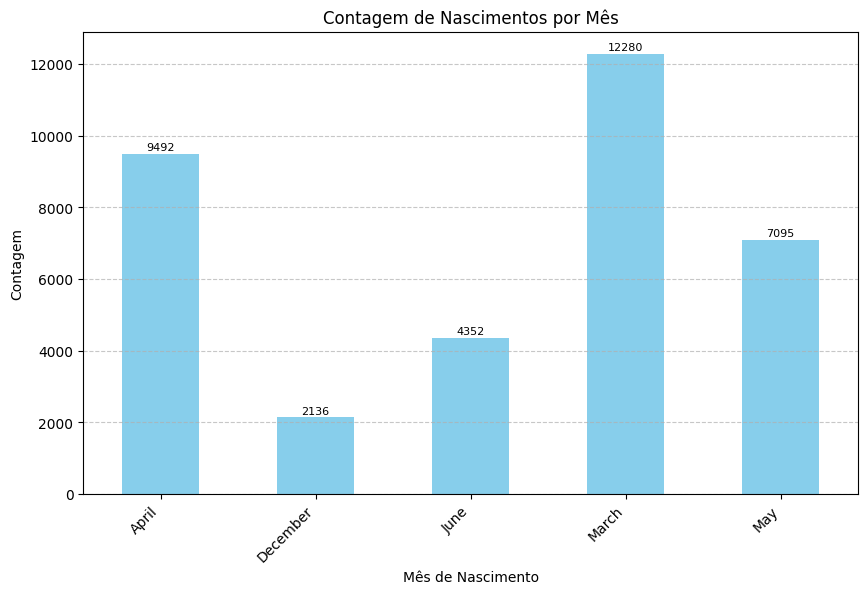

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos arquivos CSV
marco = pd.read_csv('SINASC_RO_2019_MAR.csv')
abril = pd.read_csv('SINASC_RO_2019_ABR.csv')
maio = pd.read_csv('SINASC_RO_2019_MAI.csv')
junho = pd.read_csv('SINASC_RO_2019_JUN.csv')
dezembro = pd.read_csv('SINASC_RO_2019_DEZ.csv')

# Concatenação dos DataFrames
df = pd.concat([marco, abril, maio, junho, dezembro], ignore_index=True)

# Convertendo a coluna 'DTNASC' para o formato de data
df['DTNASC'] = pd.to_datetime(df['DTNASC'], errors='coerce')

# Filtrando para incluir apenas os meses desejados (março, abril, maio, junho e dezembro)
df = df[(df['DTNASC'].dt.month.isin([3, 4, 5, 6, 12])) & (df['DTNASC'].dt.year == 2019)]

# Criando a coluna de mês em português
df['MES_NASC'] = df['DTNASC'].dt.month_name()

# Contagem de registros por mês
contagem_por_mes = df['MES_NASC'].value_counts().sort_index()

# Gráfico de barras para a contagem de registros por mês
plt.figure(figsize=(10, 6))
barplot = contagem_por_mes.plot(kind='bar', color='skyblue')

# Adicionando rótulos nas barras com a contagem
for i, valor in enumerate(contagem_por_mes):
    plt.text(i, valor + 50, str(valor), ha='center', va='bottom', fontsize=8)

# Configurações do gráfico
plt.title('Contagem de Nascimentos por Mês')
plt.xlabel('Mês de Nascimento')
plt.ylabel('Contagem')

# Formatando os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()


# • Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficospros meses/anos seguintes.

Digite os números dos meses desejados separados por vírgula (por exemplo, 1,2,3): 1,2,3,4,5,6,7,8,9,10,11,12


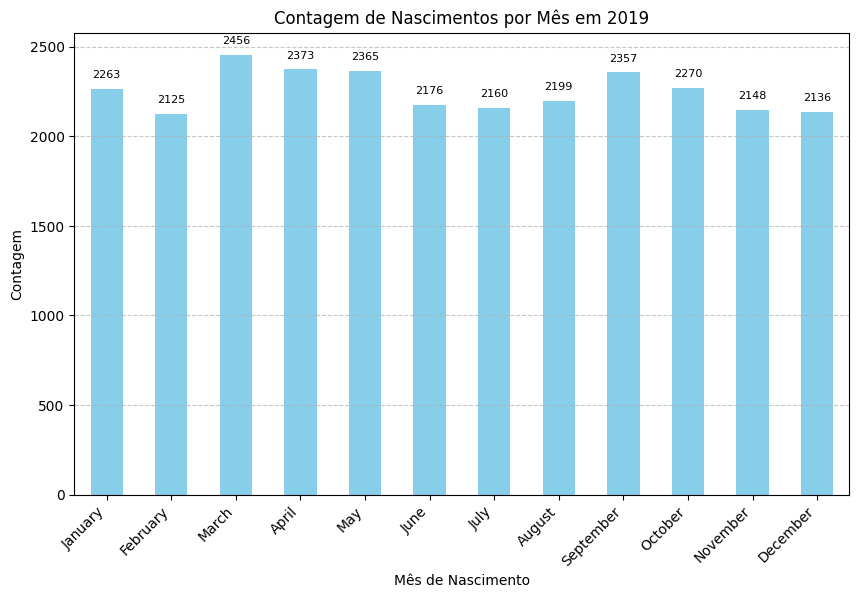

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para obter os meses desejados do usuário
def obter_meses_desejados():
    meses = input("Digite os números dos meses desejados separados por vírgula (por exemplo, 1,2,3): ")
    meses = [int(m) for m in meses.split(',')]
    return meses

# Leitura do arquivo CSV
df = pd.read_csv('SINASC_RO_2019.csv')

# Convertendo a coluna 'DTNASC' para o formato de data
df['DTNASC'] = pd.to_datetime(df['DTNASC'], errors='coerce')

# Obter os meses desejados do usuário
meses_desejados = obter_meses_desejados()

# Filtrando para incluir apenas os meses desejados
df = df[(df['DTNASC'].dt.month.isin(meses_desejados)) & (df['DTNASC'].dt.year == 2019)].copy()

# Criando a coluna de mês em português usando .loc para evitar SettingWithCopyWarning
df.loc[:, 'MES_NASC'] = df['DTNASC'].dt.month_name()

# Contagem de registros por mês
contagem_por_mes = df['MES_NASC'].value_counts().sort_index()

# Reordenar o índice para que os meses apareçam em ordem
contagem_por_mes = contagem_por_mes.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Gráfico de barras para a contagem de registros por mês
plt.figure(figsize=(10, 6))
barplot = contagem_por_mes.plot(kind='bar', color='skyblue')

# Adicionando rótulos nas barras com a contagem
for i, valor in enumerate(contagem_por_mes):
    plt.text(i, valor + 50, str(valor), ha='center', va='bottom', fontsize=8)

# Configurações do gráfico
plt.title('Contagem de Nascimentos por Mês em 2019')
plt.xlabel('Mês de Nascimento')
plt.ylabel('Contagem')

# Formatando os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()



**A ideia de permitir que o usuário escolha os meses a serem exibidos no gráfico oferece uma maior flexibilidade e personalização na análise dos dados. Aqui estão alguns pontos que destacam a vantagem dessa abordagem:**

## 1. Personalização dos Dados:

Permite que o usuário selecione especificamente os meses de interesse para a análise. Isso é útil quando se deseja focar em determinados períodos ou identificar padrões sazonais específicos.
## 2.Análise Direcionada:

Com a opção de escolher meses específicos, o usuário pode direcionar a análise para eventos sazonais ou variações temporais específicas. Isso é valioso para insights mais direcionados e contextualizados.
## 3. Adaptação a Necessidades Específicas:

Em algumas situações, certos meses podem ser mais relevantes para a análise, dependendo do contexto. Dar ao usuário a capacidade de escolher esses meses aumenta a utilidade e aplicabilidade da visualização.
## 4. Foco na Interatividade:

Tornar a visualização mais interativa ao permitir que o usuário escolha os meses aumenta a participação e envolvimento com os dados. Isso é especialmente útil em situações em que diferentes usuários podem ter diferentes interesses ou áreas de foco.
## 5. Evita Visualizações Excessivamente Complexas:

Ao permitir que o usuário escolha meses específicos, evitamos a criação de gráficos excessivamente complexos com muitos dados. Isso facilita a interpretação e compreensão da informação visualizada.
Quanto ao gráfico em si, a modificação para ordenar os meses proporciona uma representação mais intuitiva dos dados. Isso é importante porque o eixo x (Mês de Nascimento) agora segue a ordem natural do calendário, o que facilita a interpretação para o usuário. A ordenação alfabética poderia levar a uma interpretação menos clara, especialmente se a análise estiver relacionada a padrões sazonais específicos.






